### Data Cleaning for the Revenue and Subscriber Chart

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('netflix static/revenue/netflix-annual-revenue-2002-2023.csv')
data

,year,revenue
0,2002,150.8
1,2003,270.4
2,2004,500.6
3,2005,682.2
4,2006,996.7
5,2007,"1,205.30"
6,2008,"1,364.70"
7,2009,"1,670.30"
8,2010,"2,162.60"
9,2011,"3,204.60"


In [3]:
data['revenue_cleaned'] = pd.to_numeric(data['revenue'].str.replace(',', ''))
data

,year,revenue,revenue_cleaned
0,2002,150.8,150.80
1,2003,270.4,270.40
2,2004,500.6,500.60
3,2005,682.2,682.20
4,2006,996.7,996.70
5,2007,"1,205.30",1205.30
6,2008,"1,364.70",1364.70
7,2009,"1,670.30",1670.30
8,2010,"2,162.60",2162.60
9,2011,"3,204.60",3204.60


In [4]:
# Calculate the growth rate
data['growth_rate'] = data['revenue_cleaned'].pct_change() * 100
data['growth_rate'] = data['growth_rate'].fillna(0)
data

,year,revenue,revenue_cleaned,growth_rate
0,2002,150.8,150.80,0.000000
1,2003,270.4,270.40,79.310345
2,2004,500.6,500.60,85.133136
3,2005,682.2,682.20,36.276468
4,2006,996.7,996.70,46.100850
5,2007,"1,205.30",1205.30,20.929066
6,2008,"1,364.70",1364.70,13.224923
7,2009,"1,670.30",1670.30,22.393200
8,2010,"2,162.60",2162.60,29.473747
9,2011,"3,204.60",3204.60,48.182743


Text(0, 0.5, 'Growth Rate (%)')

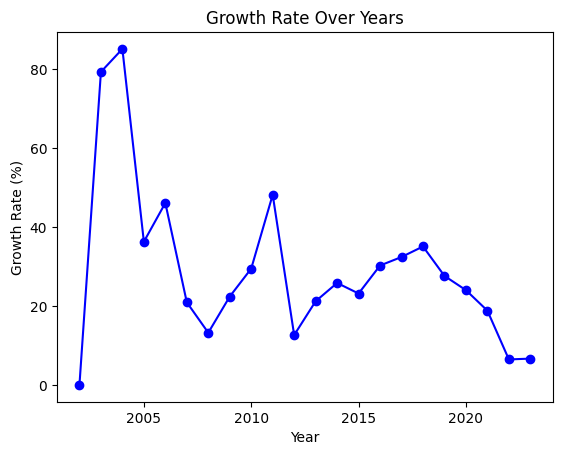

In [5]:
plt.plot(data['year'], data['growth_rate'], marker='o', color='b', linestyle='-')

plt.title('Growth Rate Over Years')
plt.xlabel('Year')
plt.ylabel('Growth Rate (%)')

### Data Cleaning for the Map

In [6]:
maps = pd.read_csv('netflix static/expansion/countries.csv')
maps

,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
244,Wallis and Futuna,WF,WLF,876,ISO 3166-2:WF,Oceania,Polynesia,NaN,9.0,61.0,NaN
245,Western Sahara,EH,ESH,732,ISO 3166-2:EH,Africa,Northern Africa,NaN,2.0,15.0,NaN
246,Yemen,YE,YEM,887,ISO 3166-2:YE,Asia,Western Asia,NaN,142.0,145.0,NaN
247,Zambia,ZM,ZMB,894,ISO 3166-2:ZM,Africa,Sub-Saharan Africa,Eastern Africa,2.0,202.0,14.0


In [7]:
maps[maps['sub-region'] == 'Latin America and the Caribbean'].shape

(52, 11)

In [8]:
maps['sub-region'].unique()

array(['Southern Asia', 'Northern Europe', 'Southern Europe',
       'Northern Africa', 'Polynesia', 'Sub-Saharan Africa',
       'Latin America and the Caribbean', nan, 'Western Asia',
       'Australia and New Zealand', 'Western Europe', 'Eastern Europe',
       'Northern America', 'South-eastern Asia', 'Eastern Asia',
       'Melanesia', 'Micronesia', 'Central Asia'], dtype=object)

In [9]:
maps[maps['region'] == 'Europe']

,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
5,Andorra,AD,AND,20,ISO 3166-2:AD,Europe,Southern Europe,NaN,150.0,39.0,NaN
14,Austria,AT,AUT,40,ISO 3166-2:AT,Europe,Western Europe,NaN,150.0,155.0,NaN
20,Belarus,BY,BLR,112,ISO 3166-2:BY,Europe,Eastern Europe,NaN,150.0,151.0,NaN
21,Belgium,BE,BEL,56,ISO 3166-2:BE,Europe,Western Europe,NaN,150.0,155.0,NaN
28,Bosnia and Herzegovina,BA,BIH,70,ISO 3166-2:BA,Europe,Southern Europe,NaN,150.0,39.0,NaN
34,Bulgaria,BG,BGR,100,ISO 3166-2:BG,Europe,Eastern Europe,NaN,150.0,151.0,NaN
55,Croatia,HR,HRV,191,ISO 3166-2:HR,Europe,Southern Europe,NaN,150.0,39.0,NaN
59,Czechia,CZ,CZE,203,ISO 3166-2:CZ,Europe,Eastern Europe,NaN,150.0,151.0,NaN


In [30]:
usa = maps[maps['name'] == 'United States of America'][['name', 'alpha-3']]
usa['year'] = 1997
usa

,name,alpha-3,year
235,United States of America,USA,1997


In [10]:
canada = maps[maps['name'] == 'Canada'][['name', 'alpha-3']]
canada['year'] = 2010
canada

,name,alpha-3,year
40,Canada,CAN,2010


In [11]:
latin = maps[
    (maps['sub-region'] == 'Latin America and the Caribbean') & 
    (~maps['name'].isin(['Cuba']))
][['name', 'alpha-3']]
latin['year'] = 2011
latin.head()

,name,alpha-3,year
7,Anguilla,AIA,2011
9,Antigua and Barbuda,ATG,2011
10,Argentina,ARG,2011
12,Aruba,ABW,2011
16,Bahamas,BHS,2011


In [12]:
maps[maps['alpha-3'] == 'GBR'].name.values

array(['United Kingdom of Great Britain and Northern Ireland'],
      dtype=object)

In [13]:
EU_first = ['United Kingdom of Great Britain and Northern Ireland', 
            'Ireland', 'Denmark', 'Finland', 'Norway', 'Sweden']
EU = maps[maps.name.isin(EU_first)][['name', 'alpha-3']]
EU['year'] = 2012
EU

,name,alpha-3,year
60,Denmark,DNK,2012
75,Finland,FIN,2012
107,Ireland,IRL,2012
166,Norway,NOR,2012
214,Sweden,SWE,2012
234,United Kingdom of Great Britain and Northern I...,GBR,2012


In [14]:
netherlands = maps[maps['name'] == 'Netherlands'][['name', 'alpha-3']]
netherlands['year'] = 2013
netherlands

,name,alpha-3,year
156,Netherlands,NLD,2013


In [28]:
maps[maps['alpha-3'] == 'USA']

,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
235,United States of America,US,USA,840,ISO 3166-2:US,Americas,Northern America,NaN,19.0,21.0,NaN


In [16]:
EU_second = ['Austria', 'Belgium', 'France', 'Germany', 'Luxembourg', 'Switzerland', 'India']
further_EU = maps[maps.name.isin(EU_second)][['name', 'alpha-3']]
further_EU['year'] = 2014
further_EU

,name,alpha-3,year
14,Austria,AUT,2014
21,Belgium,BEL,2014
76,France,FRA,2014
83,Germany,DEU,2014
103,India,IND,2014
130,Luxembourg,LUX,2014
215,Switzerland,CHE,2014


In [17]:
coun2015 = ['Cuba', 'Italy', 'Portugal', 'Spain', 'Japan', 'Australia', 'New Zealand']
ex2015 = maps[maps.name.isin(coun2015)][['name', 'alpha-3']]
ex2015['year'] = 2015
ex2015

,name,alpha-3,year
13,Australia,AUS,2015
56,Cuba,CUB,2015
110,Italy,ITA,2015
112,Japan,JPN,2015
158,New Zealand,NZL,2015
178,Portugal,PRT,2015
209,Spain,ESP,2015


In [31]:
com_avail_before = pd.concat([usa, canada, latin, EU, netherlands, further_EU, ex2015], axis=0)
com_avail_before.reset_index(drop=True, inplace=True)
com_avail_before

,name,alpha-3,year
0,United States of America,USA,1997
1,Canada,CAN,2010
2,Anguilla,AIA,2011
3,Antigua and Barbuda,ATG,2011
4,Argentina,ARG,2011
...,...,...,...
69,Italy,ITA,2015
70,Japan,JPN,2015
71,New Zealand,NZL,2015
72,Portugal,PRT,2015


In [32]:
exclude2016 = ['China', 'Korea (Democratic People\'s Republic of)', 'Syrian Arab Republic', 'Russian Federation']
ex2016 = maps[~maps.name.isin(exclude2016) & ~maps.name.isin(com_avail_before.name)][['name', 'alpha-3']]
ex2016['year'] = 2016
ex2016

,name,alpha-3,year
0,Afghanistan,AFG,2016
1,Åland Islands,ALA,2016
2,Albania,ALB,2016
3,Algeria,DZA,2016
4,American Samoa,ASM,2016
...,...,...,...
244,Wallis and Futuna,WLF,2016
245,Western Sahara,ESH,2016
246,Yemen,YEM,2016
247,Zambia,ZMB,2016


In [33]:
combine = pd.concat([usa, canada, latin, EU, netherlands, further_EU, ex2015, ex2016], axis=0)
combine.reset_index(drop=True, inplace=True)
combine

,name,alpha-3,year
0,United States of America,USA,1997
1,Canada,CAN,2010
2,Anguilla,AIA,2011
3,Antigua and Barbuda,ATG,2011
4,Argentina,ARG,2011
...,...,...,...
240,Wallis and Futuna,WLF,2016
241,Western Sahara,ESH,2016
242,Yemen,YEM,2016
243,Zambia,ZMB,2016


In [34]:
combine.rename(columns={'alpha-3': 'ISO'}, inplace=True)
combine

,name,ISO,year
0,United States of America,USA,1997
1,Canada,CAN,2010
2,Anguilla,AIA,2011
3,Antigua and Barbuda,ATG,2011
4,Argentina,ARG,2011
...,...,...,...
240,Wallis and Futuna,WLF,2016
241,Western Sahara,ESH,2016
242,Yemen,YEM,2016
243,Zambia,ZMB,2016


In [35]:
combine.to_csv('netflix static/expansion/expansion_countries.csv', index=False)